# Introduction

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_curve,roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading dataset

df_csv = pd.read_csv("framingham_heart_disease.csv")

# Exploratory Data Analysis

In [3]:
df_csv.head(7)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1


In [4]:
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
male               4238 non-null int64
age                4238 non-null int64
education          4133 non-null float64
currentSmoker      4238 non-null int64
cigsPerDay         4209 non-null float64
BPMeds             4185 non-null float64
prevalentStroke    4238 non-null int64
prevalentHyp       4238 non-null int64
diabetes           4238 non-null int64
totChol            4188 non-null float64
sysBP              4238 non-null float64
diaBP              4238 non-null float64
BMI                4219 non-null float64
heartRate          4237 non-null float64
glucose            3850 non-null float64
TenYearCHD         4238 non-null int64
dtypes: float64(9), int64(7)
memory usage: 529.8 KB


In [5]:
df_csv.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [6]:
df_csv.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

# Visualization

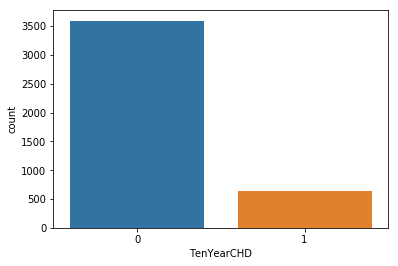

In [7]:
sns.countplot(df_csv.TenYearCHD)

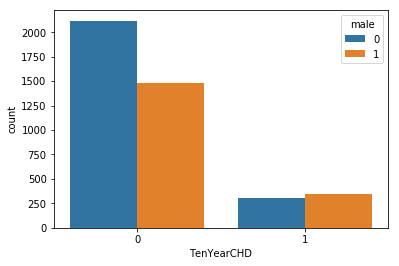

In [8]:
sns.countplot(x='TenYearCHD',hue='male',data = df_csv)

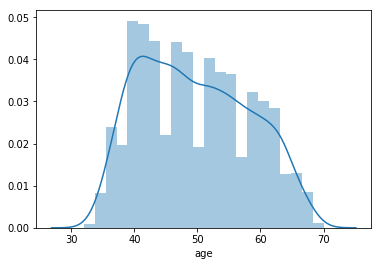

In [9]:
sns.distplot(df_csv.age)

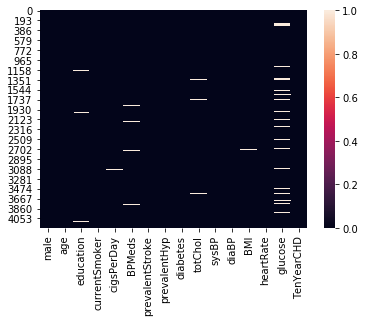

In [10]:
sns.heatmap(df_csv.isnull())

In [11]:
mean = df_csv.mean()

In [12]:
df_csv.fillna(mean, inplace=True)

In [13]:
df_csv.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [14]:
Xloc=df_csv.iloc[:,0:14]
Yloc=df_csv.iloc[:,-1]

In [15]:
# Splitting data into train/test

XTrain,XTest,YTrain,YTest = train_test_split(Xloc,Yloc,test_size=0.20,random_state=0)

In [16]:
# Intializing Logistic Regression model

Classifier = LogisticRegression()
Classifier.fit(XTrain,YTrain)
YPred=Classifier.predict(XTest)

[[709   1]
 [133   5]]


Text(0.5, 15.0, 'Predicted values')

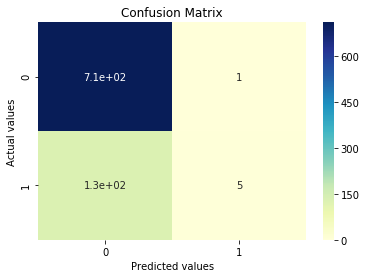

In [17]:
# Outcome/ Output

CM=confusion_matrix(YTest,YPred)
print(CM)

sns.heatmap(pd.DataFrame(CM),annot=True,cmap="YlGnBu")
plt.title('Confusion Matrix')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')

In [18]:
AC=accuracy_score(YTest,YPred)
PC=precision_score(YTest,YPred)
RC=recall_score(YTest,YPred)

print("Accuracy score:",AC)
print("Precision score:",PC)
print("Recall score:",RC)

Accuracy score: 0.8419811320754716
Precision score: 0.8333333333333334
Recall score: 0.036231884057971016


# ROC Curve

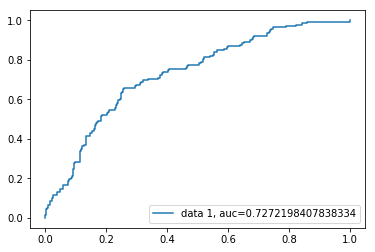

In [19]:
y_pred_proba = Classifier.predict_proba(XTest)[::,1]
fpr, tpr, _ = roc_curve(YTest,  y_pred_proba)
auc = roc_auc_score(YTest, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()